In [1]:
import seaborn as sns

In [12]:
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

## DISPLOT IS FOR UNIVARIATE (SINGLE VARIABLE)

The distplot shows the distribution of a univariate set of observations.

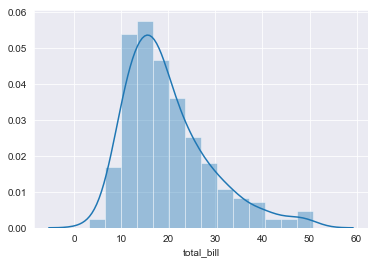

In [13]:
sns.distplot(tips['total_bill']);

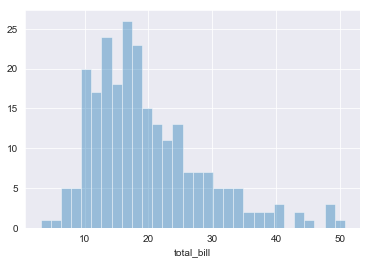

In [15]:
sns.distplot(tips['total_bill'], kde=False, bins=30);

## JOINTPLOT FOR BIVARIATES (2 VARIABLES)

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

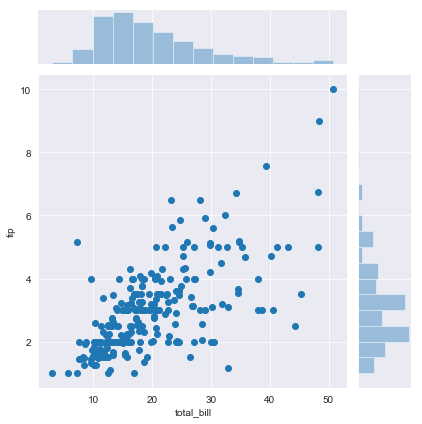

In [17]:
sns.jointplot(x='total_bill', y='tip', data=tips); # default is scatter plot

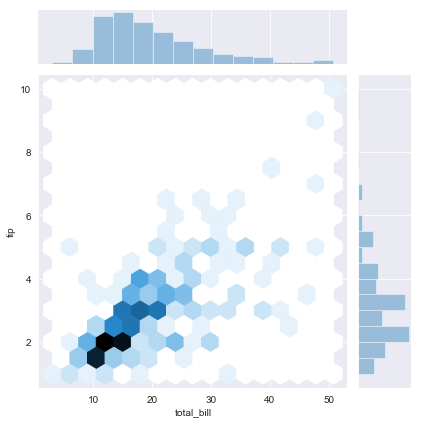

In [18]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex');

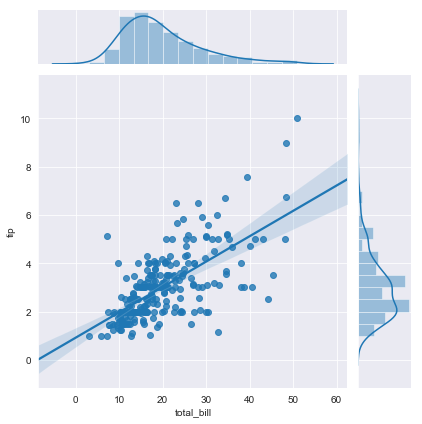

In [19]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg'); # reg means regression

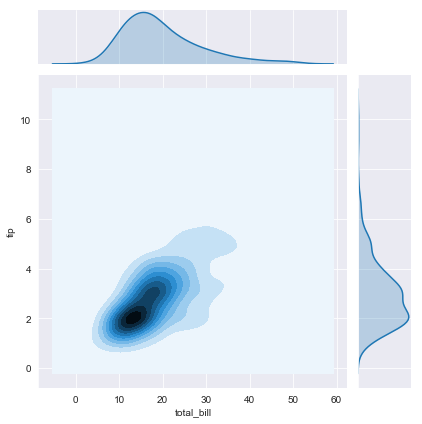

In [20]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde'); 

## PAIRPLOT 

SHOWS PAIRWISE RELATIONSHIP ESPECIALLY NUMERIC COLUMNS, COLOR HUE ARGUMENTS USED FOR CATEGORICAL VARIBLES

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

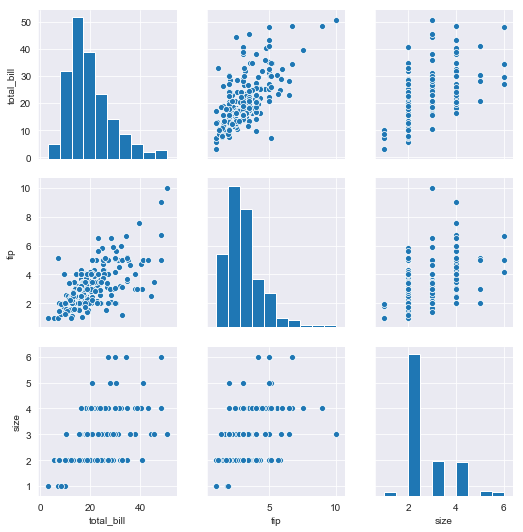

In [22]:
sns.pairplot(tips);

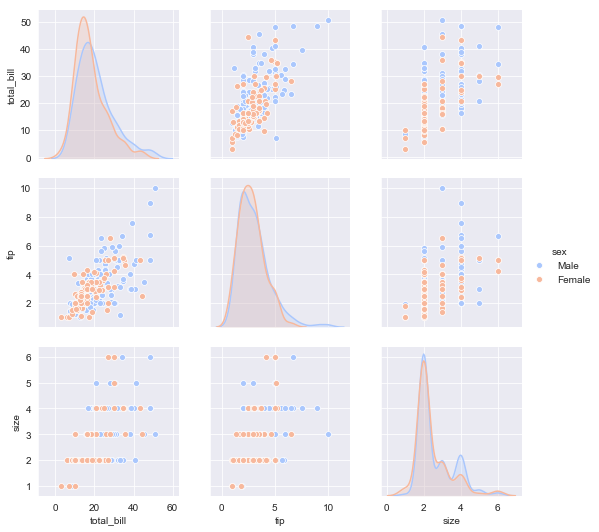

In [24]:
sns.pairplot(tips, hue='sex', palette='coolwarm');

## RUGPLOT SHOWS EACH DATAPOINT

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

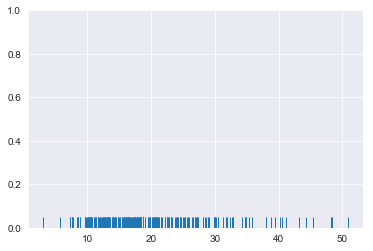

In [26]:
sns.rugplot(tips['total_bill']);

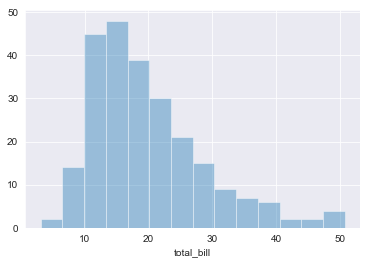

In [29]:
sns.distplot(tips['total_bill'], kde=False);

In [30]:
# The difference between histogram and rugplot is that in histogram there is a bin 
# and the values falls in that bins are counted,
# on the other hand in rugplot, each datapoint is shown independently

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

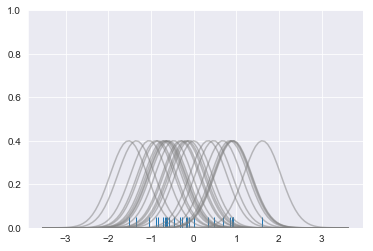

In [34]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1);

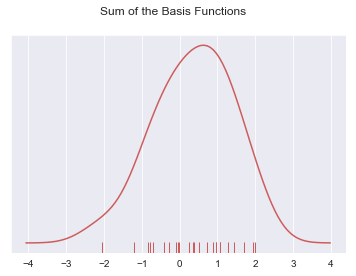

In [33]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions");